In [1]:
import cymetric as cym
import pandas as pd
import matplotlib.pyplot as plt
import sys
from cymetric import graphs as cgr
from cymetric import timeseries as tm

%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
def fracmass_to_frac_atom(mass):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    return mass * uma_238 / uma_235

def get_frac(file, facility):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.inventories(ev, facilities=facility, nucs=['238U'])
    df1_u5 = tm.inventories(ev, facilities=facility, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def get_frac_transaction(file, rec=[''], send=['']):
    uma_235 = 235043928.190e-6
    uma_238 = 238050786.996e-6
    db = cym.dbopen(file)
    ev = cym.Evaluator(db=db, write=False)
    df1_u8 = tm.transactions(ev, receivers=rec, senders=send, nucs=['238U'])
    df1_u5 = tm.transactions(ev, receivers=rec, senders=send, nucs=['235U'])
    df_r = df1_u5
    df_r[df_r.columns[1]] = (df1_u5[df1_u5.columns[1]]/uma_235)/(df1_u8[df1_u8.columns[1]]/uma_238 + df1_u5[df1_u5.columns[1]]/uma_235)
    return df_r

def format_df(df, x_label, y_label):
    df.fillna(0, inplace=True)
    return pd.DataFrame({x_label: df[df.columns[0]], y_label: df[df.columns[1]]})

def make_plot(dfs, x_name, y_name, figsize = (20,12), mk = 'x', mk_z=14, linestyle='-', mfc='none'):
    e1x = dfs[0].plot(x=x_name, y=y_name, 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize)
    for df in dfs[1:]:
        df.plot(x=x_name, y=y_name, 
                      marker=mk, markersize=mk_z, linestyle=linestyle, 
                      mfc=mfc, figsize=figsize, ax=e1x)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.savefig('trans.png', dpi=326)
    plt.legend()


In [3]:
db_ = cym.dbopen("cyclus.sqlite")
ev_ = cym.Evaluator(db=db_, write=False)
file = "cyclus.sqlite"

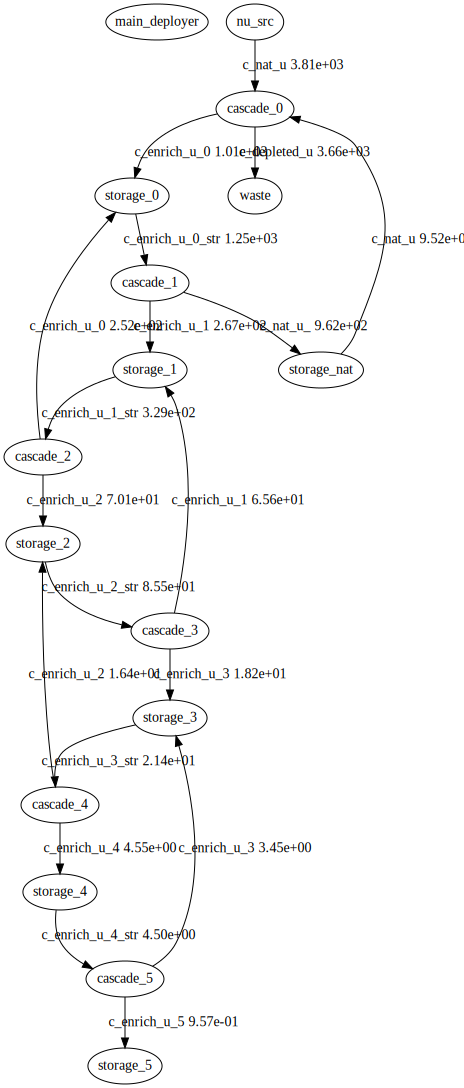

In [4]:
flow_graph = cgr.flow_graph(ev_)
flow_graph

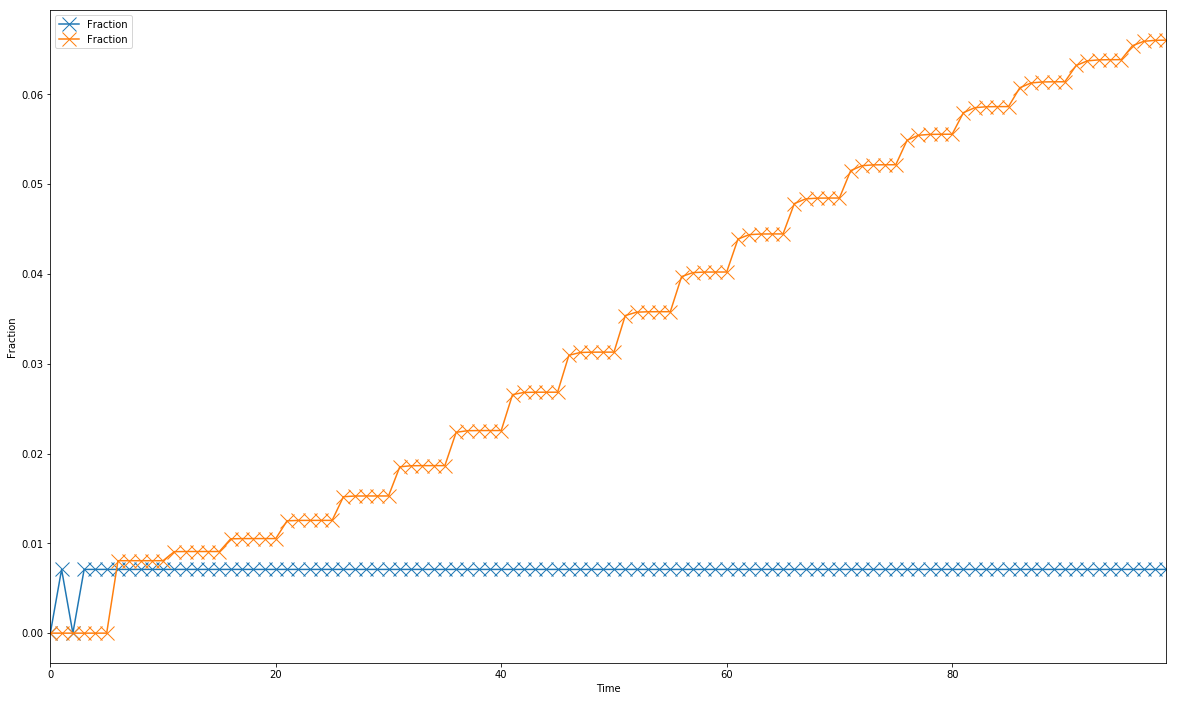

In [12]:
in_tr_0 = get_frac_transaction(file, rec=['cascade_0'], send=['nu_src'])
in_tr_1 = get_frac_transaction(file, rec=['cascade_0'], send=['storage_nat'])
#in_tr_2 = get_frac_transaction(file, rec=['storage_2'], send=['cascade_2'])
#in_tr_3 = get_frac_transaction(file, rec=['storage_3'], send=['cascade_3'])
#in_tr_4 = get_frac_transaction(file, rec=['storage_4'], send=['cascade_4'])
#in_tr_5 = get_frac_transaction(file, rec=['storage_5'], send=['cascade_5'])
plt_str = []
plt_str.append(format_df(in_tr_0, "Time", "Fraction"))
plt_str.append(format_df(in_tr_1, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_2, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_3, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_4, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_5, "Time", "Fraction"))
make_plot(plt_str, "Time", "Fraction" )

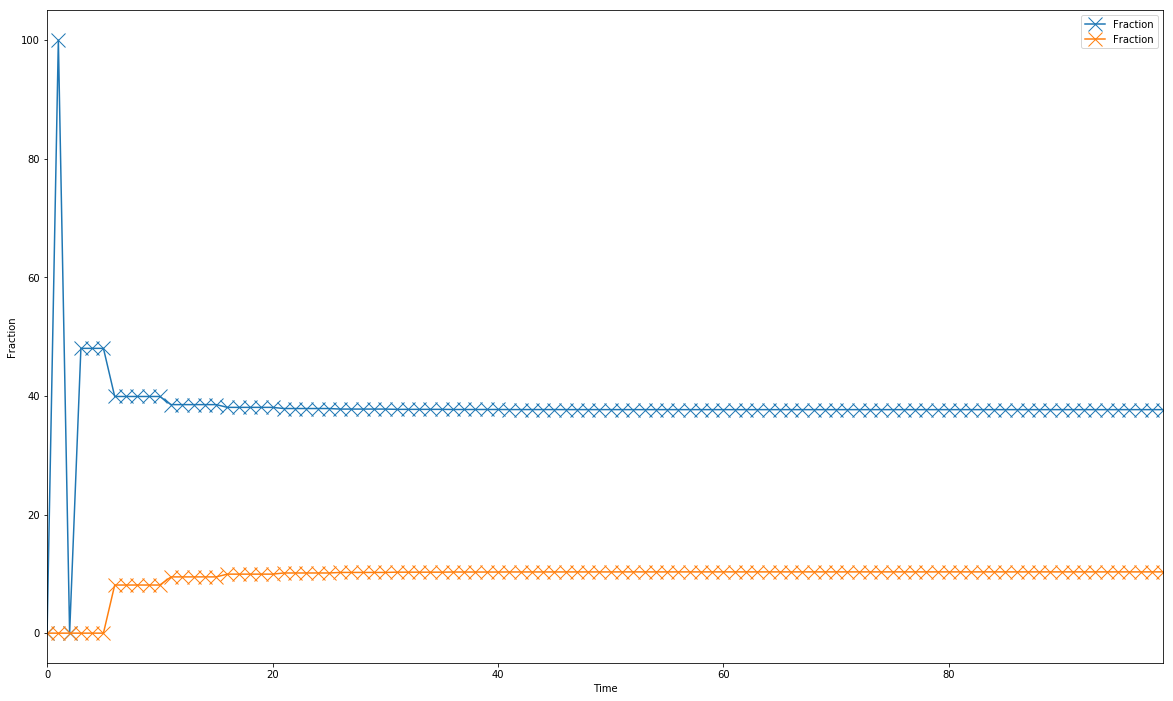

In [11]:
in_tr_0 = tm.transactions(ev_, receivers=['cascade_0'], senders=['nu_src'])
in_tr_1 = tm.transactions(ev_, receivers=['cascade_0'], senders=['storage_nat'])
#in_tr_2 = get_frac_transaction(file, rec=['storage_2'], send=['cascade_2'])
#in_tr_3 = get_frac_transaction(file, rec=['storage_3'], send=['cascade_3'])
#in_tr_4 = get_frac_transaction(file, rec=['storage_4'], send=['cascade_4'])
#in_tr_5 = get_frac_transaction(file, rec=['storage_5'], send=['cascade_5'])
plt_str = []
plt_str.append(format_df(in_tr_0, "Time", "Fraction"))
plt_str.append(format_df(in_tr_1, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_2, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_3, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_4, "Time", "Fraction"))
#plt_str.append(format_df(in_tr_5, "Time", "Fraction"))
make_plot(plt_str, "Time", "Fraction" )


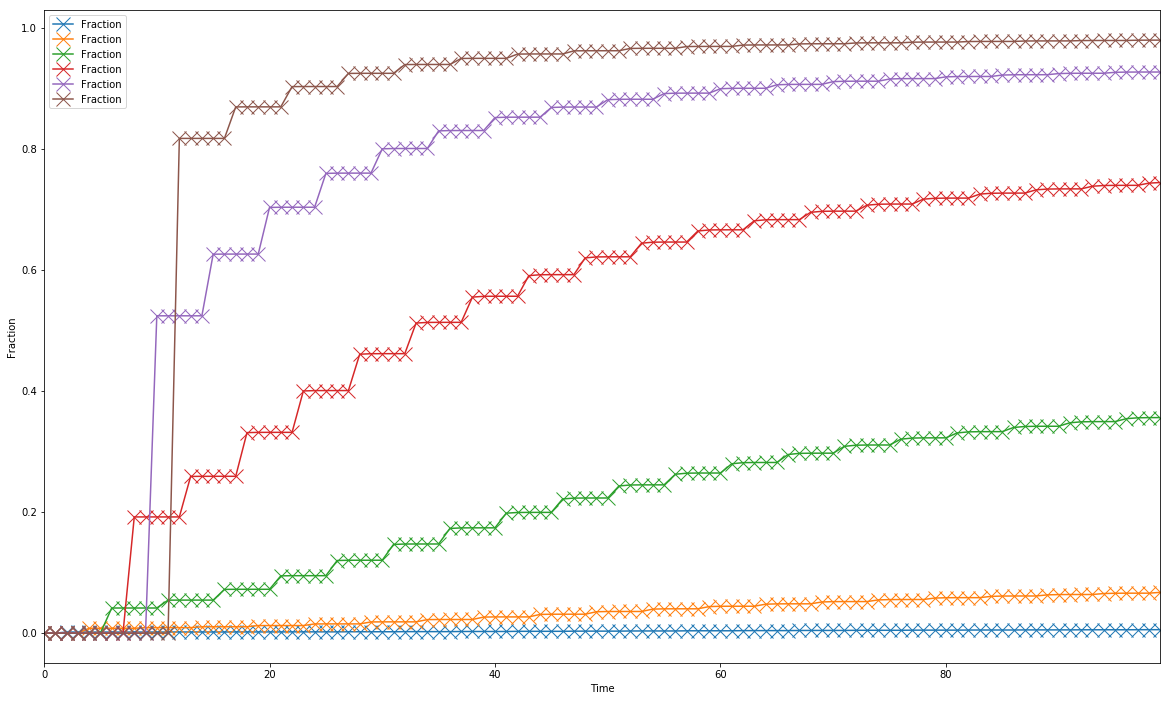

In [7]:
in_str_fr_0 = get_frac(file, facility=['cascade_0'])
in_str_fr_1 = get_frac(file, facility=['cascade_1'])
in_str_fr_2 = get_frac(file, facility=['cascade_2'])
in_str_fr_3 = get_frac(file, facility=['cascade_3'])
in_str_fr_4 = get_frac(file, facility=['cascade_4'])
in_str_fr_5 = get_frac(file, facility=['cascade_5'])

plt_str_fr = []
plt_str_fr.append(format_df(in_str_fr_0, "Time", "Fraction"))
plt_str_fr.append(format_df(in_str_fr_1, "Time", "Fraction"))
plt_str_fr.append(format_df(in_str_fr_2, "Time", "Fraction"))
plt_str_fr.append(format_df(in_str_fr_3, "Time", "Fraction"))
plt_str_fr.append(format_df(in_str_fr_4, "Time", "Fraction"))
plt_str_fr.append(format_df(in_str_fr_5, "Time", "Fraction"))
make_plot(plt_str_fr, "Time", "Fraction" )



/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/timeseries.py:133: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


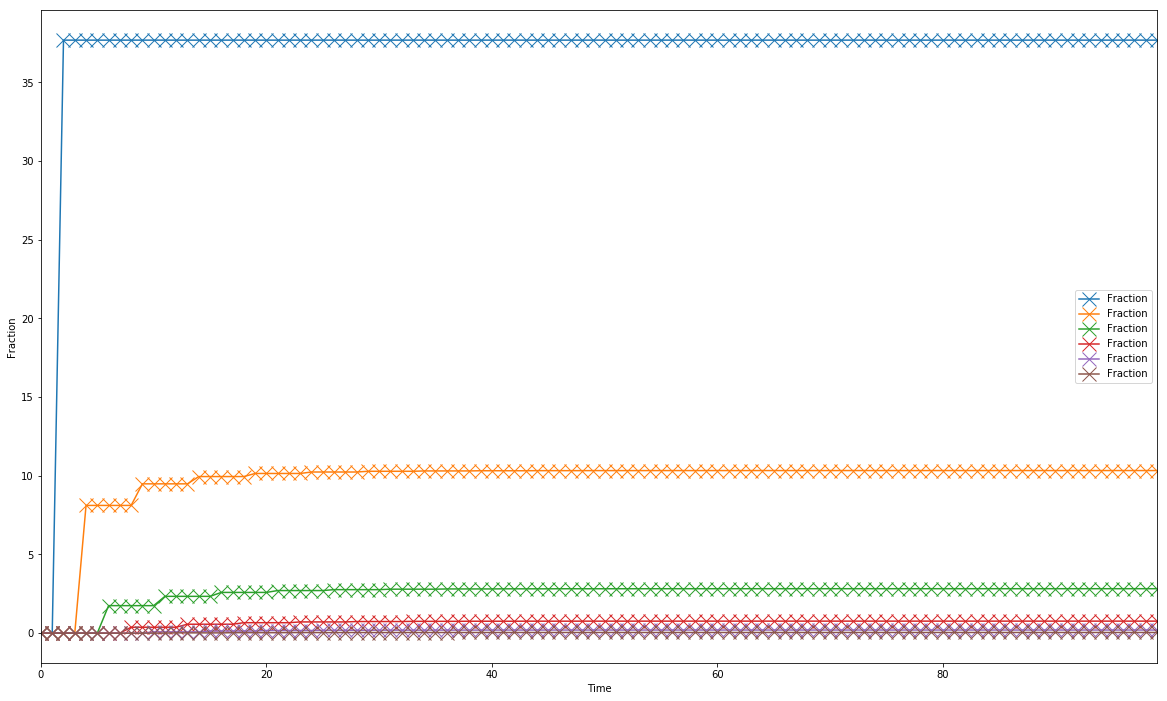

In [8]:
in_str_0 = tm.inventories(ev_, facilities=['cascade_0'])
in_str_1 = tm.inventories(ev_, facilities=['cascade_1'])
in_str_2 = tm.inventories(ev_, facilities=['cascade_2'])
in_str_3 = tm.inventories(ev_, facilities=['cascade_3'])
in_str_4 = tm.inventories(ev_, facilities=['cascade_4'])
in_str_5 = tm.inventories(ev_, facilities=['cascade_5'])
plt_str = []
plt_str.append(format_df(in_str_0, "Time", "Fraction"))
plt_str.append(format_df(in_str_1, "Time", "Fraction"))
plt_str.append(format_df(in_str_2, "Time", "Fraction"))
plt_str.append(format_df(in_str_3, "Time", "Fraction"))
plt_str.append(format_df(in_str_4, "Time", "Fraction"))
plt_str.append(format_df(in_str_5, "Time", "Fraction"))
make_plot(plt_str, "Time", "Fraction" )

In [10]:
in_str_fr_1

,Time,Quantity
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.008068
5,5,0.008068
6,6,0.008068
7,7,0.008068
8,8,0.008068
9,9,0.009077
